# Model Monitoring - XAI 

## Using XAI for model monitoring and data drift

In [1]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

#pandas
import pandas as pd

#numpy
import numpy as np

#sklearn 
from sklearn.metrics import classification_report,confusion_matrix,auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_score, roc_auc_score, roc_curve

#XGboost
import xgboost as xgb

#matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#SHAP & Other
from scipy.stats import uniform, randint
import pickle
from scipy import stats
import shap
import time
import pickle


In [2]:
data = pd.read_csv('UCI Credit Card Ready.csv')
X = data.drop("Default_Target",axis=1)
y = data.Default_Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42,shuffle=True)

In [3]:
{


# xg_boost = xgb.XGBClassifier(objective="binary:logistic",eval_metric="auc")

# def train_model(model,train_data, train_target):
#     print("Training the model with {}:\n".format(model))
#     model.fit(train_data,train_target)
    
# def report_best_scores(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
    
# """Function calls for AdaBoost and GradientBoost"""
    
# #train_model(xg_boost, X_train, y_train)

# """Applying RandomizedSearchCV for XGBoost"""

# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "scale_pos_weight": [4,5,6], # default 1
#     "max_depth": [2,5,7,10,12], # default 3
#     "n_estimators": randint(100, 650), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search_random = RandomizedSearchCV(xg_boost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
# print("Training the model with {}:\n".format(search_random))
# search_random.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
# print("Reporting best scores: \n")
# report_best_scores(search_random.cv_results_, 3)
# best_model = search_random.best_estimator_

# filename = 'finalized_model.sav'
# pickle.dump(best_model, open(filename, 'wb'))

        "Tag": [
        "Code to train Xgboost model",
    ]}

{'Tag': ['Code to train Xgboost model']}

# Load the train XGBoost Model 

## Log standard machine learning measures

In [4]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)

In [5]:
def cross_val(model,train_data,train_target):

    cv = cross_val_score(model,train_data,train_target,cv=5,verbose=2,n_jobs=-1)
    print("Cross-Validation score for Xgboost:{}".format(cv.mean()))
    print("-"*50)

def model_evaluation(model,test_data,test_target): 
    print("Predicting the outcomes using Xgboost")
    print('.'*50)
    y_pred = model.predict(test_data)
    print("Classification report using Xgboost \n")
    print(classification_report(y_pred,test_target))
    print('-'*50)
    print("Confusion matrix using Xgboost \n")
    print(confusion_matrix(y_pred,test_target))
    print('-'*50)
    print("ROC AUC score using Xgboost \n")
    print(roc_auc_score(y_pred,test_target))
    print('-'*50)

def plot_roc_auc(model, test_data):
    
    y_pred = model.predict(test_data)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    print("ROC AUC plot")
    # Plot ROC
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
    
"""Function call for XG Boost- RandomizedSearch Best Estimator"""
cross_val(loaded_model, X_train,y_train) 
model_evaluation(loaded_model,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.2s finished


Cross-Validation score for Xgboost:0.7915160194821584
--------------------------------------------------
Predicting the outcomes using Xgboost
..................................................
Classification report using Xgboost 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5373
           1       0.58      0.47      0.52      2006

    accuracy                           0.76      7379
   macro avg       0.70      0.67      0.68      7379
weighted avg       0.75      0.76      0.75      7379

--------------------------------------------------
Confusion matrix using Xgboost 

[[4687  686]
 [1064  942]]
--------------------------------------------------
ROC AUC score using Xgboost 

0.670957906106731
--------------------------------------------------


# Using SHAP to further investigate XGBoost Model

In [6]:
"""Training the SHAP model"""
start = time.time()
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(X_test)
end = time.time()

print("Number of Seconds for training the SHAP explainer",end - start, '\n')

print("The summary plot suggests each variables' contribution to the prediction value.\
Blue color suggests that var pushes the score towards 0 and red color suggests prediction score towards 1")

Number of Seconds for training the SHAP explainer 9.920476198196411 

The summary plot suggests each variables' contribution to the prediction value.Blue color suggests that var pushes the score towards 0 and red color suggests prediction score towards 1


## SHAP Summary Plot

### From the plot, it shows that PAY_1 and LIMIT_BAL are the most important variables in the dataset, which means that those two variables have the biggest impact on the prediction.



> **LIMIT_BAL: Amount of given credit in NT dollars**

> **PAY_0: Repayment status in the latest statement (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months 9=payment delay for nine months and above)**

> **BILL_AMT1: Amount of the latest bill statement.**

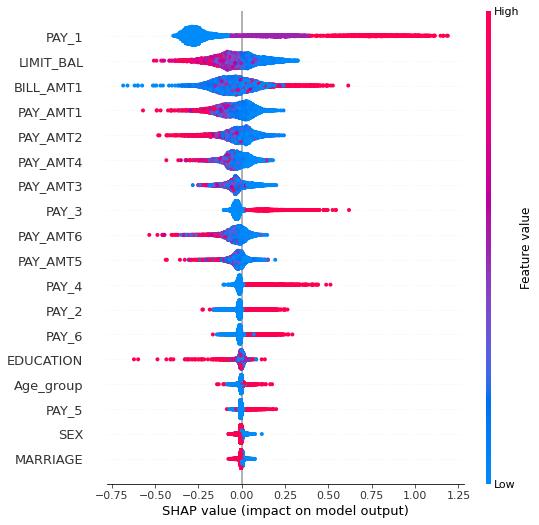

Number of Seconds for training the SHAP summary_plot 1.8849616050720215


In [7]:
start = time.time()
shap.summary_plot(shap_values, X_test)
end = time.time()
print("Number of Seconds for training the SHAP summary_plot",end - start)

## Dependence Plot

###  From the plot, we can observe that BILL_AMT and PAY_1 positive relationship with default. As you have higher balance on your credit statement and more months of delay, it is more likely to default on your next statement. This relationship is reflected on the Dependence Plot.

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


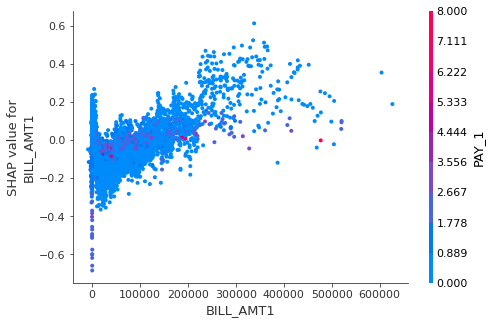

In [8]:
shap.dependence_plot('BILL_AMT1', shap_values, X_test)

# Experiment (BIG PART)

## I run the model for 100 times, each time, I bootstrap 50 samples from the test data

## For each iteration, TreeExplainer tries to explain the "new data" while retain the model

## Since I introduced a bug after 30th iteration, we should observe changes in the SHAP Value

> **I swap PAY_1 with PAY_6 values**

> **While keep track of the standard model measures and SHAP value of PAY_1**

In [9]:
%%time

temp = pd.concat([X_test, y_test], axis = 1)
loss, loss1 = [], []
index = list(temp).index('PAY_1')
auc, precision = [],[]
 
for i in range(100):
    temp2 = temp.sample(50, replace = True)
    
    if i < 30:
        explain_loss = shap.TreeExplainer(loaded_model, 
                                          temp2)
        
        auc.append(roc_auc_score(temp2['Default_Target'],
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))
        
        precision.append(precision_score( temp2['Default_Target'], 
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))
        
        prob_loss = explain_loss.shap_values(temp2)
        
        loss.append(prob_loss[:,index])
        
    else:
        # The SWAP is here after 30th iterations
        PAY_1, PAY_6 = temp2['PAY_1'], temp2['PAY_6']
        LIMIT_BAL, PAY_AMT5 = temp2['LIMIT_BAL'], temp2['PAY_AMT5']
        
        temp2['PAY_1'] = PAY_6
        temp2['PAY_6'] = PAY_1
        
        explain_loss = shap.TreeExplainer(loaded_model, temp2)
        
        auc.append(roc_auc_score(temp2['Default_Target'],
                                 loaded_model.predict_proba(temp2.drop('Default_Target', axis = 1))[:,1]))
        
        precision.append(precision_score(temp2['Default_Target'], 
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))

        
        prob_loss = explain_loss.shap_values(temp2)
                
        loss.append(prob_loss[:,index])
        

Wall time: 41 s


## Let us investigate the SHAP value for a specific observation

**This customer default on his credit card**

> This customer is 2 months behind from payment and has $71876 outstanding.

In [10]:
index = list(y_test).index(1)
pd.DataFrame(X_test.iloc[index,:]).transpose()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age_group
7330,240000.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,71876.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,0.0


**Let us look at the SHAP value for this customer. The PAY_1 variable has the biggest contribution, which indicates that that customer highly likely to default the bill.**

In [11]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

**Now, let us swap variable PAY_1 and PAY_2 and recalculate the SHAP values. So we can observe the differences.**

In [12]:
PAY_1, PAY_6 = X_test.iloc[:, list(X_test).index('PAY_1')], X_test.iloc[:, list(X_test).index('PAY_6')]

X_test.PAY_1 = PAY_6
X_test.PAY_6 = PAY_1

shap_values = explainer.shap_values(X_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Let us look at the SHAP value again. The PAY_1 variable still has the biggest contribution, but in the wrong direction. This way, it just predict that this customer will not default on this payment. This difference clearly needs to be further investigated.**

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

# Analyze the Experiment

## Let us plot the AUC for the 100 iteration, can't perceive significant difference after 30th iteration. 

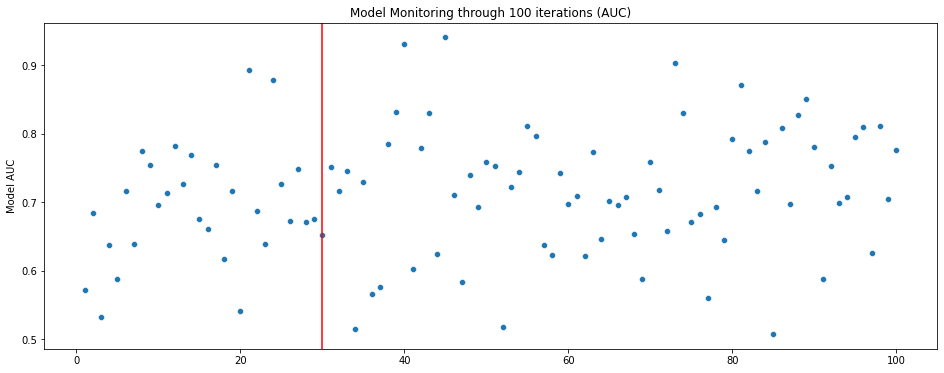

In [14]:
plt.figure(figsize=(16,6))
plt.title('Model Monitoring through 100 iterations (AUC)')
plt.ylabel('Model AUC')
sns.scatterplot(x=range(1, 101),y = auc)
plt.axvline(x=30, color = 'r')
plt.show()

## Let us plot the Precision for the 100 iteration, we can't perceive significant difference after 30th iteration as well.

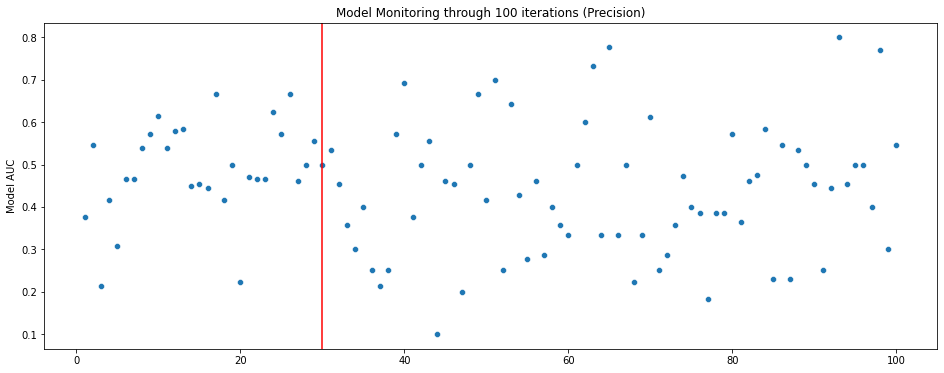

In [15]:
plt.figure(figsize=(16,6))
plt.title('Model Monitoring through 100 iterations (Precision)')
plt.ylabel('Model AUC')
sns.scatterplot(x=range(1, 101), y = precision)
plt.axvline(x=30, color = 'r')
plt.show()

## Let us plot the SHAP value for PAY_1 during the 100 iteration, we can detect significant differences after 30th iteration as well.

## We can know something is wrong with data. Attention needed to solve the problem.

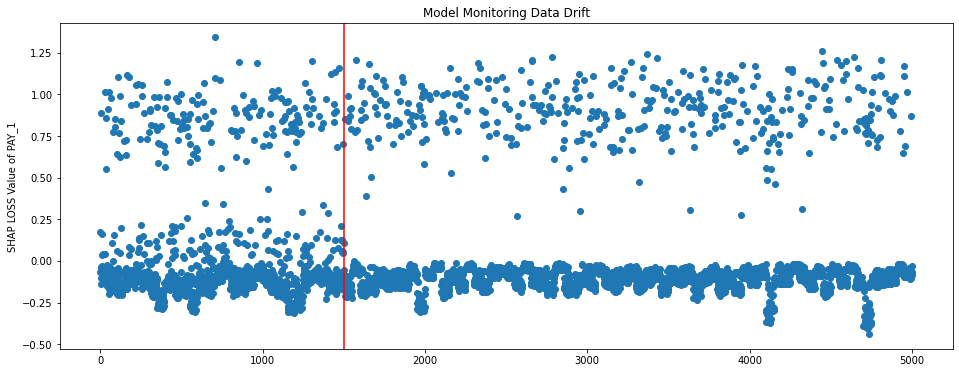

In [16]:
np_loss = np.asarray(loss)
np_loss = np_loss.ravel()

plt.figure(figsize=(16,6))
plt.title('Model Monitoring Data Drift')
plt.ylabel('SHAP LOSS Value of PAY_1')
plt.scatter(range(1, 5001),np_loss)
plt.axvline(x=1500, color = 'r')
plt.show()